# Bioanalyzer Analysis

- In 2100 Expert:
    - select samples
    - `File > Export...` 
    - select sample data (probably choose `unaligned`)
    
https://matplotlib.org/faq/usage_faq.html#what-is-a-backend

In [ ]:
# use if you want larger plots
import matplotlib as mpl
mpl.use('macosx')

In [90]:
import peakutils as pu
import scipy as sp
from scipy.ndimage import gaussian_filter1d

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

sns.set_style('ticks')

## Load Data

In [91]:
names = ['iv_64_1',
         'iv_64_2',
         'iv_64_3',
         'iv_64_4',
         'iv_64_5',
         'iv_64_6',
         'iv_64_7',
         'iv_64_8',
         'iv_64_9',
         'iv_64_10',
         'iv_64_11',
         'iv_64_12',
        'iv_64_13',
        'iv_64_14']
folder = '/Volumes/GoogleDrive/My Drive/tapestation_data/20201209'

d = {}

d['ladder'] = pd.read_csv('{}/ladder.csv'.format(folder))
for name in names:
    d[name] = pd.read_csv('{}/{}.csv'.format(folder,name))

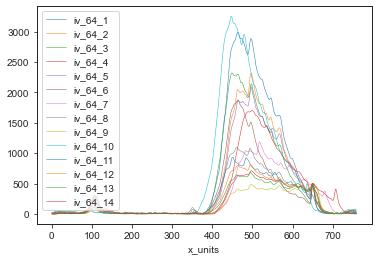

In [92]:
cd = {'uh': '#005200',
      'um': '#00CC00',
      'ul': '#4CFF4C',
      'lh': '#800000',
      'lm': '#BE0000',
      'll': '#FB0000'}

for i,(k) in enumerate(names):
    v = d[k]
    if k=='ladder':
        continue
    plt.plot(v.x_units, v.Value, lw=.5, label=k)
    plt.xlabel('x_units')
plt.legend()
plt.show()

## Look at ladder

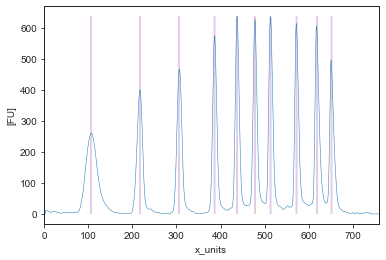

In [93]:
df = d['ladder']
x = np.array(df.x_units)
y = np.array(df.Value)

i_raw = pu.indexes(y, thres=.1, min_dist=30)
x_raw = x[i_raw]
x_interpolated = pu.interpolate(x, y, ind=i_raw, width=10)

plt.xlim(x.min(),x.max())
plt.vlines(x_raw,0,y.max(), lw=.2, color='r')
plt.vlines(x_interpolated,0,y.max(), lw=.2, color='b')
plt.xlabel('x_units')
plt.ylabel('[FU]')
plt.plot(x,y, lw=.5)
plt.show()

/Users/mja/opt/miniconda3/envs/mutseq/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


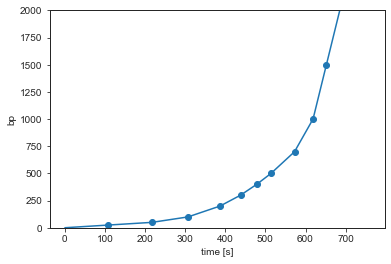

In [94]:
# std curve
nts = [25,50,100,200,300,400,500,700,1000,1500]
ls = np.linspace(x.min(),x.max(),100)
spline = sp.interpolate.UnivariateSpline(x_interpolated, nts, k=1,s=1)
spline_i = sp.interpolate.UnivariateSpline(nts, x_interpolated, k=1,s=1)
plt.scatter(x_interpolated,nts)
plt.plot(ls,spline(ls))
plt.xlabel('time [s]')
plt.ylabel('bp')
plt.ylim(0,2000)
# plt.xscale('log')
# plt.yscale('log')
# plt.savefig('/Volumes/GoogleDrive/My Drive/tapestation_data/20201209/tapestation-std-curve.pdf')
plt.show()

## Plot individual

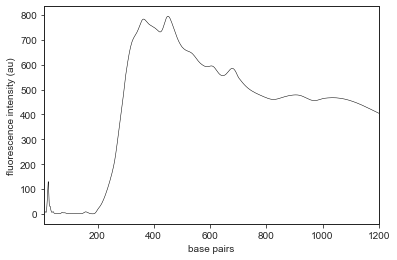

In [95]:
plt.rcParams['axes.linewidth'] = 1 #set the value globally



df = d['iv_64_12']
x = np.array(df.x_units)
y = np.array(df.Value)

y_smooth = gaussian_filter1d(y,3)

i_raw = pu.indexes(y_smooth, thres=.01, min_dist=1)
x_raw = x[i_raw]
x_interpolated = pu.interpolate(x, y_smooth, ind=i_raw, width=2)

plt.xlim(10,1200)
# plt.vlines(spline(x_raw),0,y.max(), lw=.2, color='r')
# plt.vlines(spline(x_interpolated),0,y.max(), lw=.2, color='b')
plt.xlabel('base pairs')
plt.ylabel('fluorescence intensity (au)')
plt.plot(spline(x),y_smooth, lw=.5, color='k')

peak_nt = spline(x_interpolated)
peak_nt

# plt.savefig('/Users/mja/Appel_MutSequencing/tapestation/Fig5_plots/IV_64_1_plot.png')
# plt.savefig('/Users/mja/Appel_MutSequencing/tapestation/Fig5_plots/IV_64_1_plot.pdf')

plt.show()

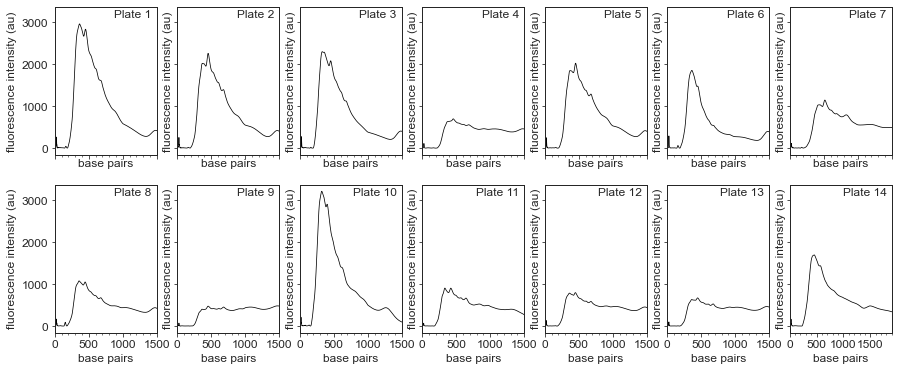

In [89]:
##plot all in grid (plates 1-13)
plt.rcParams['axes.linewidth'] = 1 #set the value globally
arialfont= {'fontname':'Arial'}



plateL=np.arange(1,15)
fig, axs = plt.subplots(2,7,figsize=(15,6), sharex=True, sharey=True)



for index, entry in enumerate(plateL):
    currentax = axs[index//7, index%7]
    dfName='iv_64_' + str(entry)
    tempDF= d[dfName]
    x = np.array(tempDF.x_units)
    y = np.array(tempDF.Value)
    y_smooth = gaussian_filter1d(y,3)

    i_raw = pu.indexes(y_smooth, thres=.01, min_dist=1)
    x_raw = x[i_raw]
    x_interpolated = pu.interpolate(x, y_smooth, ind=i_raw, width=2)
    currentax.plot(spline(x),y_smooth, lw=.75, color='k')
    label_name="Plate "+str(entry)
    currentax.annotate(label_name, xy=(0.95, 0.98), 
                       xycoords='axes fraction', 
                       fontsize=12,
                       horizontalalignment='right', 
                       verticalalignment='top', **arialfont)
    #add labels, remove in AI except for edges if desired
    currentax.set_xlabel('base pairs', fontsize=12, **arialfont)
    currentax.set_ylabel('fluorescence intensity (au)', fontsize=12,**arialfont)
    currentax.set_xlim(0,1500)
    currentax.set_xticks(np.arange(0,2000,500), minor=False)
    currentax.set_xticks(np.arange(0,2000,100), minor=True)
    currentax.set_xticklabels(np.arange(0,2000,500),fontsize=12, **arialfont)
    currentax.set_yticks(np.arange(0,4000,1000), minor=False)
    currentax.set_yticklabels(np.arange(0,4000,1000),fontsize=12, **arialfont);   
plt.savefig('/Users/mja/Appel_MutSequencing/tapestation/IV_64_1-14_trace_plot.png')
plt.savefig('/Users/mja/Appel_MutSequencing/tapestation/IV_64_1-14_trace_plot.pdf')

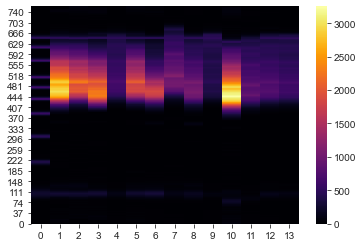

In [99]:
mat = np.array([np.array(v.Value) for k,v in d.items()])

#drop ladder and plate 14
mat_1to13=mat[0:14]

cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(mat_1to13.T, cmap='inferno')
plt.gca().invert_yaxis()

plt.savefig('/Users/mja/Appel_MutSequencing/tapestation/IV_64_1-13_raw_plot_inferno.png')
plt.savefig('/Users/mja/Appel_MutSequencing/tapestation/IV_64_1-13_raw_plot_inferno.pdf')

plt.show()



In [20]:
peak_nt = np.array([1.43465871e+00, 1.87324353e+01, 2.55775139e+01, 3.24023856e+02,
       4.02175658e+02, 1.26298363e+03, 2.82743843e+03, 2.94949902e+03])

def plotter(samples):
    plt.figure(figsize=(12,6))
    sp = plt.subplot()
    sp.set_xlabel('bp')
    sp.set_ylabel('fluor [au]')
    sp.spines['left'].set_visible(False)
    sp.spines['right'].set_visible(False)
    sp.spines['top'].set_visible(False)

    sp.set_xlim(spline_i(0),spline_i(1500))

    samples = samples
    labels = samples
    colors = [cd[s] for s in samples]
    # annotate peaks at peak_nt
    pk_h={}
    for pk in peak_nt:
        pk_h = max([d[k].iloc[abs(d[k].x_units-spline_i(pk)).argmin()].Value for k in samples])
        print(pk, pk_h)
#         sp.vlines(spline_i(pk),0,pk_h, lw=.3)
        sp.annotate(int(round(pk)), (spline_i(pk), pk_h), color='black', fontname='Arial', fontsize=12, rotation=60)
        
    for s,l,c in zip(samples,labels,colors):
        df = d[s]
        sp.plot(df.x_units, df.Value, lw=.7, label=l, c=c)
    sp.legend(title='sublibrary',frameon=False, fontsize=12, title_fontsize=12)
    # sp.set_ylim(0,1.1)
    # sp.set_xlim(25,2500)
    plt.xticks(spline_i([0,100,200,300,400,500,600,700,800,900,1000]), [0,100,200,300,400,500,600,'',800,'',1000])
    sp.tick_params(labelsize=15)
    sp.xaxis.label.set_fontsize(15)
    sp.yaxis.label.set_fontsize(15)
    
    plt.show()
    
# plotter(['uh','um','ul'])
# plt.savefig('out/uniform.pdf')
# plotter(['lh','lm','ll'])
# plt.savefig('out/linear.pdf')

# qPCR

In [52]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df = pd.read_csv('qpcr.csv')
df['lib'] = df.name.str[:2]
df['dil'] = 10**(df.name.str[-1].apply(float)+2)
df['pM'] = df.sq*df.dil * 399./249.
df

,well,name,cq,sq,tm,tm-height,lib,dil,pM
0,A03,us1,7.379643,20.511221,81,4191.037885731,us,1000.0,32867.377542
1,A04,us1,7.093405,24.760366,81,3689.24615593398,us,1000.0,39676.249452
2,A05,us2,9.469262,5.188957,81,3928.23586629353,us,10000.0,83148.353671
3,A06,us2,9.471855,5.180115,81,4268.40335964612,us,10000.0,83006.664604
4,A07,us3,12.552963,0.682658,81,4160.88330837764,us,100000.0,109389.809541
5,A08,us3,12.673714,0.630537,81,4171.20518572633,us,100000.0,101037.793457
6,A09,xx1,8.486983,10.000000,82.5,6239.74207951234,xx,1000.0,16024.096386
7,A10,xx1,8.442179,10.000000,82.5,5832.6482589744,xx,1000.0,16024.096386
8,B03,uh1,7.925474,14.324243,81,4260.166872174,uh,1000.0,22953.305761
9,B04,uh1,7.882568,14.734249,81,4294.6843617379,uh,1000.0,23610.303394


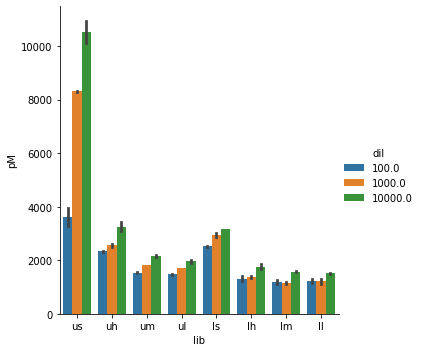

In [96]:
sns.catplot(x='lib', y='pM', hue='dil', data=df[~df.name.str.contains('xx') & ~df.name.str.contains('bb')], kind='bar')
plt.show()

In [109]:
df[~df.name.str.contains('xx') & ~df.name.str.contains('bb')].groupby(['lib','name']).mean().groupby('lib').mean().round(1)

,cq,sq,dil,pM
lib,,,,
lh,12.1,3.1,37000.0,14854.1
ll,12.3,2.8,37000.0,13139.4
lm,12.3,2.8,37000.0,13096.6
ls,11.1,5.9,37000.0,28786.5
uh,11.2,5.4,37000.0,27149.1
ul,11.9,3.5,37000.0,17158.0
um,11.8,3.6,37000.0,18336.1
us,9.8,9.5,37000.0,74854.4


In [91]:
mw=(617.96 * 249) + 36.04
mw

153908.08000000002

# Concentration Discrepancy

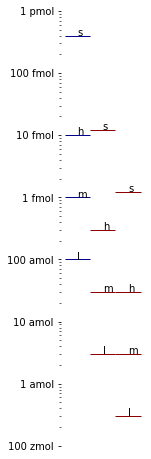

In [205]:
dils = list('shml')
y_original = [400,10,1,.1]
y_actual = np.array(x_original)/33.
plt.figure(figsize=(1.5,8))
plt.ylim(1e-4,1e3)
plt.yscale('log')
plt.gca().set_yticklabels(['','100 zmol','1 amol', '10 amol','100 amol','1 fmol','10 fmol','100 fmol','1 pmol'])
plt.gca().get_xaxis().set_visible(False)
plt.gca().set_frame_on(False)

plt.hlines(y_original, 0, .5, color='darkblue',lw=1)
for y,d in zip(y_original,dils):
    plt.annotate(s=d, xy=(.25,y))
plt.hlines(y_actual, .5, 1, color='darkred',lw=1)
for y,d in zip(y_actual,dils):
    plt.annotate(s=d, xy=(.75,y))
    
y_actual = np.array(x_original)/329.
plt.hlines(y_actual, 1, 1.5, color='darkred',lw=1)
for y,d in zip(y_actual,dils):
    plt.annotate(s=d, xy=(1.25,y))
    
plt.show()

In [227]:
mw=(617.96 * 399) + 36.04
mw

246602.08000000002